# Redes Adaline

* Adaptive Linear Neuron
* 1960 - Widrow e Holf
* Alimentação adiante
* Minimizar o erro quadrático de todo o conjunto de amostras
* Vetor gradiente -> aponta para o crescimento da função

<img src="images/adaline.png">

<img src="images/gradiente.png">

* Regra delta: o ajuste nos pesos deve se dar no sentido contrário do gradiente

In [1]:
import numpy as np
import matplotlib.pyplot as plt

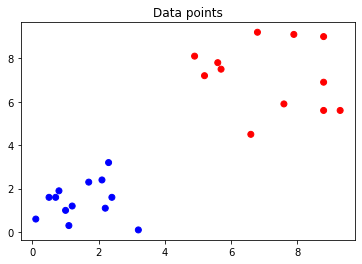

In [3]:
# Dataset
x = np.array([[1.0, 1.0], [2.1, 2.4], [1.1, 0.3], [2.3, 3.2], [0.1, 0.6],
              [0.5, 1.6], [1.7, 2.3], [0.7, 1.6], [3.2, 0.1], [2.2, 1.1],
              [0.8, 1.9], [2.4, 1.6], [1.2, 1.2], [5.2, 7.2], [6.6, 4.5],
              [4.9, 8.1], [7.6, 5.9], [8.8, 9.0], [5.6, 7.8], [8.8, 5.6],
              [7.9, 9.1], [6.8, 9.2], [8.8, 6.9], [9.3, 5.6], [5.7, 7.5]
             ])

d = np.array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

shuffle = np.random.permutation(len(x))
x = x[shuffle]
d = d[shuffle]

plt.figure(figsize=(6,4))
plt.title("Data points")
plt.scatter(x[:, 0], x[:, 1], c = d, cmap = 'bwr')
plt.show()

In [4]:
class Adaline:
    
    def __init__(self, lr, e):
        '''Construtor, define taxa de aprendizado e a taxa de erro aceita para convergir'''
        self.lr = lr
        self.e = e
        
    def activation(self, value):
        ''' 1 se value > 0, -1 senão'''
        return (1 if value >= 0 else -1)
        
    def predict(self, x):
        ''' Multiplicação matricial entre as entradas e os pesos somado ao bias proporcional'''
        return np.dot(x, self.weights.T) + self.bias * self.w_bias
    
    def evaluate(self, target, predicted):
        ''' Calcula a diferença entre o valor real e o valor predito'''
        return (target - predicted)
    
    def train(self, x, d):
        ''' Definir aleatoriamente os pesos, o bias e o peso do bias
            Enquanto a diferença entre m mse_anterior e o mse_atual for maior que 'e' continua o processo 
        '''
        self.weights = np.random.random(x.shape[1])
        self.bias = -1
        self.w_bias = np.random.random()
        
        epoch = 0
        self.total_mse = []
        last_mse = np.inf
        
        
        while True:
            mse = 0
            # Para cada amostra
            for xi, target in zip(x, d):
                
                predicted = self.predict(xi)  
                current_error = self.evaluate(target, predicted)
                mse += (current_error ** 2)
                self.weights += self.lr * current_error * xi
                self.w_bias += self.lr * current_error * self.bias
                
            mse = (mse/len(x))
            print(f"EPOCH: {epoch}\t- MSE: {mse}\t- MSE_ant - MSE: {abs(last_mse - mse)}")
            if abs(last_mse - mse) <= self.e:
                break
            
            self.total_mse.append(mse)
            last_mse = mse
            epoch +=1
            
    def test(self, x):
        ''' Dado uma lista de X, submete-os à rede'''
        results = []
        for xi in x:
            predict = self.predict(xi)
            predict = self.activation(predict)
            results.append(predict)
            
        return results

In [5]:
rede = Adaline(lr = 0.01, e = 1e-4)
rede.train(x = x, d = d)

EPOCH: 0	- MSE: 1.4707534967190399	- MSE_ant - MSE: inf
EPOCH: 1	- MSE: 0.35539226797028156	- MSE_ant - MSE: 1.1153612287487582
EPOCH: 2	- MSE: 0.27975832774238574	- MSE_ant - MSE: 0.07563394022789582
EPOCH: 3	- MSE: 0.24407162610971012	- MSE_ant - MSE: 0.03568670163267562
EPOCH: 4	- MSE: 0.22499024721249916	- MSE_ant - MSE: 0.019081378897210954
EPOCH: 5	- MSE: 0.21334856652890166	- MSE_ant - MSE: 0.0116416806835975
EPOCH: 6	- MSE: 0.20542631498353095	- MSE_ant - MSE: 0.007922251545370712
EPOCH: 7	- MSE: 0.19962361742225887	- MSE_ant - MSE: 0.00580269756127208
EPOCH: 8	- MSE: 0.1951875556381357	- MSE_ant - MSE: 0.004436061784123174
EPOCH: 9	- MSE: 0.19171905714531032	- MSE_ant - MSE: 0.003468498492825378
EPOCH: 10	- MSE: 0.18897800303729234	- MSE_ant - MSE: 0.0027410541080179762
EPOCH: 11	- MSE: 0.18680336640554515	- MSE_ant - MSE: 0.00217463663174719
EPOCH: 12	- MSE: 0.18507849113352012	- MSE_ant - MSE: 0.0017248752720250282
EPOCH: 13	- MSE: 0.18371463138037153	- MSE_ant - MSE: 0.0013

In [6]:
x_teste = np.array([[1, 4], [3, 1], [3, 2], [5, 5], [6, 7], [4, 8]])

teste_resultado = rede.test(x_teste)
teste_resultado

[-1, -1, -1, 1, 1, 1]

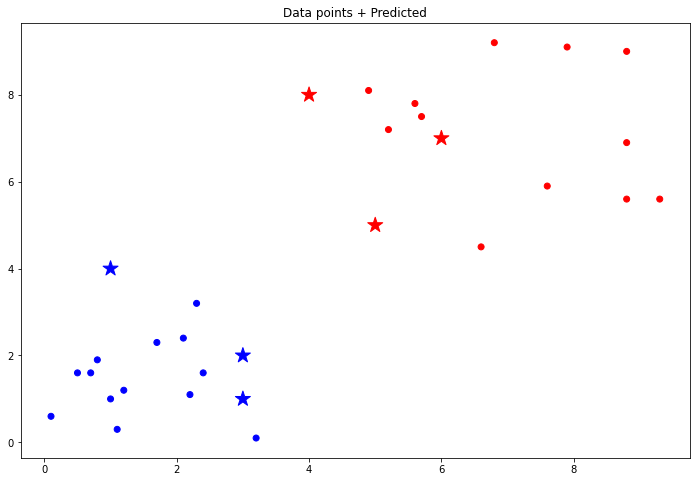

In [7]:
plt.figure(figsize=(12,8))
plt.title("Data points + Predicted")
plt.scatter(x[:, 0], x[:, 1], c = d, cmap = 'bwr')
plt.scatter(x_teste[:, 0], x_teste[:, 1], c = teste_resultado, cmap = 'bwr', marker = "*", s=250)
plt.show()

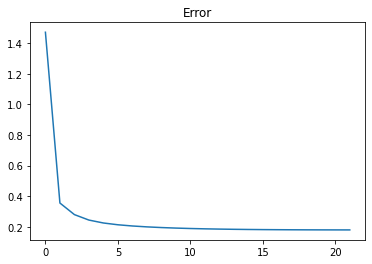

In [8]:
plt.figure(figsize=(6,4))
plt.title("Error")
plt.plot(rede.total_mse)
plt.show()